### Text Mining HW01

#### Problem 1

Using the contents of the openAPI.txt file, proceed with the preprocessing step by step below and answer the questions.

In [1]:
import os
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/Webscraping/Homeworks'

In [2]:
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/Webscraping'

In [3]:
file_path = './Data/openAPI.txt'
with open(file_path) as file :
    raw_review = file.read()
#print(raw_review)

Remove HTML tags and extract text only (Beautiful Soup use)

In [4]:
from bs4 import BeautifulSoup
review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

Convert non-alphabetic characters to spaces

In [5]:
import re
letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

Convert to lower case

In [6]:
lower_latters = letters_only.lower().split() # list

stop words removed (using nltk's englist stopwords)

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stops = set(stopwords.words('english'))

In [9]:
meaningful_words = [word for word in lower_latters if not word in stops]

Stem extraction (using `PorterStemmer()`)

In [10]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemming_words = [ps.stem(word) for word in meaningful_words]

One Combining strings with spaces (using join)

In [11]:
combined = ' '.join(stemming_words)
combined

'open api wikipedia open api wikipedia free encyclopedia jump navig jump search articl open vs privat api web servic specif see openapi specif open api often refer public api publicli avail applic program interfac provid develop programmat access proprietari softwar applic web servic api set requir govern one applic commun interact anoth api also allow develop access certain intern function program although typic case web api simplest term api allow one piec softwar interact anoth piec softwar whether within singl comput via mechan provid oper system intern extern tcp ip base non tcp ip base network current mani api provid organ access http api may use develop insid organis publish api develop outsid organis wish regist access interfac content characterist open api versu privat api privat api open api open api busi open api web see also extern link refer characterist edit open api three main characterist avail use develop user rel restrict restrict might includ necess regist servic pro

**(1) Among the words obtained in step 5 of the preprocessing task , how many words are obtained in total if duplicates are removed?**

In [14]:
print(f'It can obtain {len(set(stemming_words))} words when duplicates are removed')

It can obtain 487 words when duplicates are removed


**(2) How many times does the word ' api ' occur in total?**

In [16]:
print(f'{combined.split().count("api")} times are occurred in text')

77 times are occurred in text


**(3) What is the third most frequent [ word ] and what is the [ corresponding frequency ]?**

In [17]:
from collections import Counter
third_word, freq = Counter(stemming_words).most_common(10)[2]
print(f'The third most frequent word is "{third_word}" and its frequency is {freq}')

The third most frequent word is "web" and its frequency is 24


**(4) Using the word-frequency relationship obtained above and the code below, draw a graph of the top 20 word frequencies**

In [18]:
import matplotlib.pyplot as plt
freq_words = Counter(stemming_words).most_common(20)
keywords = [key[0] for key in freq_words]
freq = [freq[1] for freq in freq_words]

In [19]:
def plot_word_freq(keywords : list, freq : list) -> None :
    plt.figure(figsize = (10, 4))
    plt.bar(keywords, freq)
    plt.xlabel('words', fontfamily = 'Serif')
    plt.ylabel('freqency', fontfamily = 'Serif')
    plt.xticks(rotation = 90)
    plt.title('word - frequency relationship', fontsize = 12, fontfamily = 'Serif')
    plt.show()
    
def main() -> None : plot_word_freq(keywords, freq)

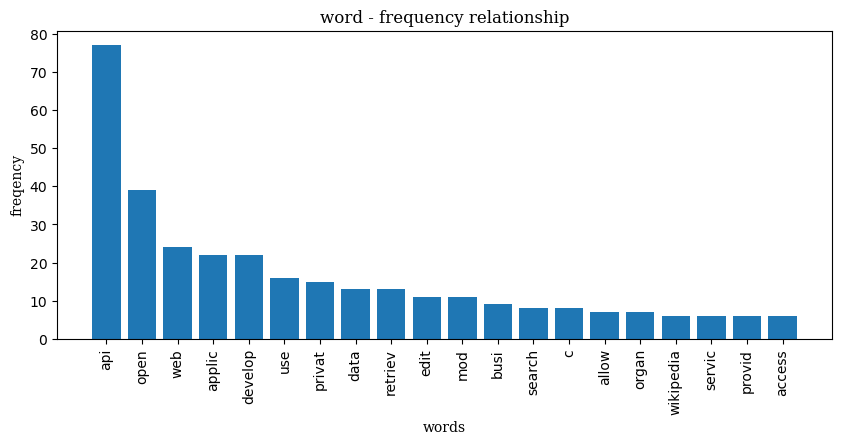

In [20]:
if __name__ == '__main__' : main();

**(5) Obtain 2- gram using the functions below, and find the frequency of the word combination { open api }**

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from nltk.tokenize import word_tokenize 
from nltk.util import ngrams

def get_ngrams(text : str, nums : int) -> list :
    n_grams = ngrams(word_tokenize(text), nums)
    out = [' '.join(grams) for grams in n_grams]
    return out

n_gram = get_ngrams(combined, 2)

**(6) Draw a frequency graph like (4) using the two-word-frequency relationship obtained in (5) above**

In [23]:
freq_words = Counter(n_gram).most_common(20)
keywords = [key[0] for key in freq_words]
freq = [freq[1] for freq in freq_words]

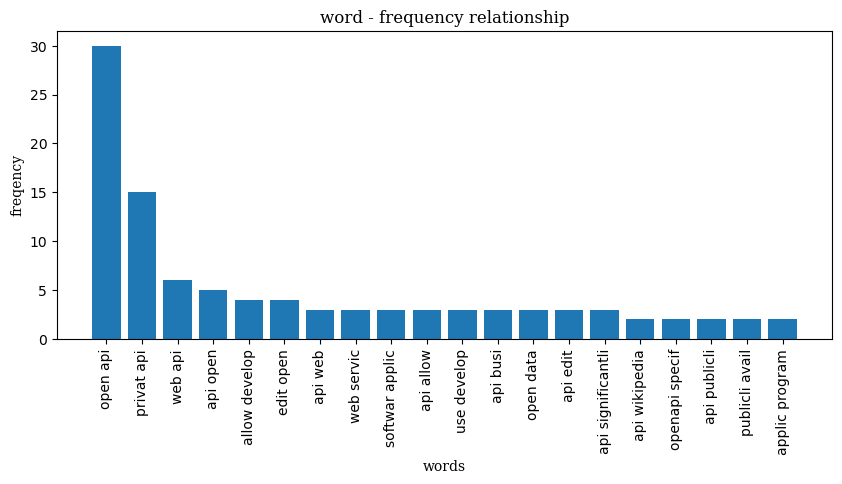

In [24]:
if __name__ == '__main__' : main();

#### Problem 2

In coin.zip, there are 5 cryptocurrency-related whitepaper txt files. Create a folder called coin in the Colab , and unzip these files. Save them in txt format, and answer the questions below

(1) Write a code that creates a file called coinzip.txt by combining all txt files in the coin.zip file using the program below, and submit the generated file (coinzip.txt) .

In [25]:
import os

path = './Data/coin'
file_list = os.listdir(path)

In [26]:
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/Webscraping'

In [27]:
file_list_py = [file for file in file_list if file.endswith('.txt')]
file_list_py

['0007.txt', '0004.txt', '0005.txt', '0001.txt', '0003.txt', 'coinzip.txt']

In [28]:
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/Webscraping'

In [29]:
with open('./Data/coin/coinzip.txt', 'wb') as outfile :
    for file in file_list_py :
        with open('./Data/coin/' + file, 'rb') as infile : outfile.write(infile.read())

(2) In the order below, read the contents of coinzip.txt as [1] string , [2] pre-process to obtain a string, and find [the second most frequent word] and [corresponding frequency].

In [30]:
with open('./Data/coin/coinzip.txt', 'rt', encoding = 'utf-8') as file: content = file.read()

In [31]:
type(content)

str

(i) Convert non-alphabetic characters to spaces

In [33]:
import re
content = re.sub(r'==.*?==+', '', content)
content = content.replace('\xa0', ' ').replace('\n', ' ').replace('\xad', ' ').replace('\t', ' ').replace('\u200b', ' ')

(ii) convert to lower case

In [34]:
content = content.lower()

(iii) Remove Stopwords (Using nltk 's English stopwords)

In [36]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(content) # tokenization

In [37]:
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english')) # convert to set to avoid repetition 
stop_tokens = [word for word in tokens if word not in english_stops]
# Create a list with only words excluding stopwords
print('#Num of tokens after stopword elimination:', len(stop_tokens))
print('#Token sample:')
print(stop_tokens[:20])

#Num of tokens after stopword elimination: 39802
#Token sample:
['whitepaper', 'blockfreight™', 'blockchain', 'global', 'freight', '.', 'julian', 'smith', 'co-founder', '&', 'ceo', ',', 'blockfreight', 'julian.smith', '@', 'blockfreight.com', '10th', 'jun', ',', '2016']


(iv) stemming (using `PorterStemmer()`)

In [34]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stem_tokens = [stemmer.stem(token) for token in stop_tokens]
print('#Num of tokens after stemming:', len(stem_tokens))
print('#Token sample:')
print(stem_tokens[:20])

#Num of tokens after stemming: 30920
#Token sample:
['whitepap', 'blockfreight', 'blockchain', 'global', 'freight', 'julian', 'smith', 'founder', 'ceo', 'blockfreight', 'julian', 'smith', 'blockfreight', 'com', '10th', 'jun', '2016', 'version', 'ublic', 'releas']


In [35]:
word_count = dict() 
for word in stem_tokens:
    word_count[word] = word_count.get(word, 0) + 1 
print('#Num of used words:', len(word_count))

#Num of used words: 2761


In [36]:
sorted_word_count = sorted(word_count, key = word_count.get, reverse = True)
print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #print top 20 frequency words
    print(f'{repr(key)}: {word_count[key]}', end=',')

#Top 20 high frequency words:
'blockchain': 344,'network': 316,'user': 266,'bitcoin': 264,'use': 226,'ethereum': 224,'transact': 222,'metavers': 218,'firstblood': 218,'smart': 204,'blockfreight': 202,'platform': 198,'token': 196,'asset': 188,'iconomi': 186,'contract': 180,'digit': 176,'system': 168,'etp': 162,'plutu': 154,

In [37]:
import nltk
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(stem_tokens) if tag in my_tag_set] 
print(my_words[:10])

['whitepap', 'blockfreight', 'blockchain', 'global', 'freight', 'julian', 'smith', 'founder', 'ceo', 'blockfreight']


Text(0.5, 1.0, 'Frequency Counts')

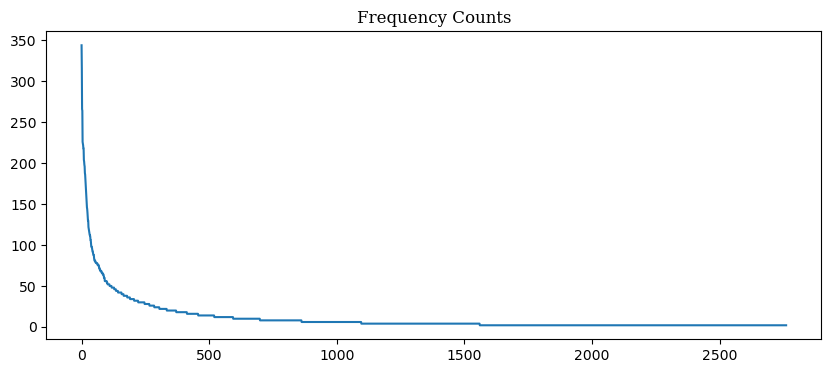

In [38]:
import matplotlib.pyplot as plt

w = [word_count[key] for key in sorted_word_count]
# Create a list by getting the frequency count for a sorted list of words

plt.figure(figsize = (10, 4))
plt.plot(w)
plt.title('Frequency Counts', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Frequentest Words')

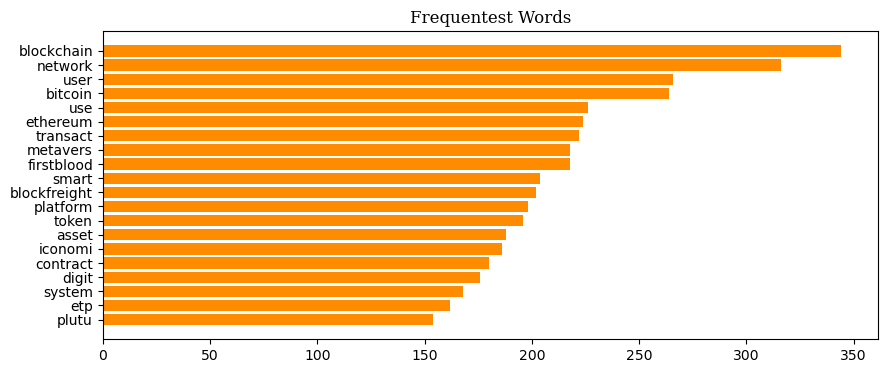

In [39]:
top_words = sorted_word_count[:20] # extract only the top 20 most frequent words
top_words_counts = [word_count[key] for key in top_words] # extract frequencies for extracted words

plt.figure(figsize = (10, 4))
plt.barh(range(len(top_words)), top_words_counts[::-1], tick_label = top_words[::-1], color = 'darkorange')
plt.title('Frequentest Words', fontsize = 12, fontfamily = 'Serif')

The second most frquent word is 'network' whose frequency is 158

(3) Draw word clouds using the strings obtained in (2) above

In [40]:
text = ' '.join(sorted_word_count)

In [42]:
from wordcloud import STOPWORDS, WordCloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state = 42, 
                      background_color = 'white',
                      colormap = 'Set2', 
                      collocations = False, 
                      stopwords = STOPWORDS).generate(content)

Text(0.5, 1.0, "WordCloud 'coinzip.txt'")

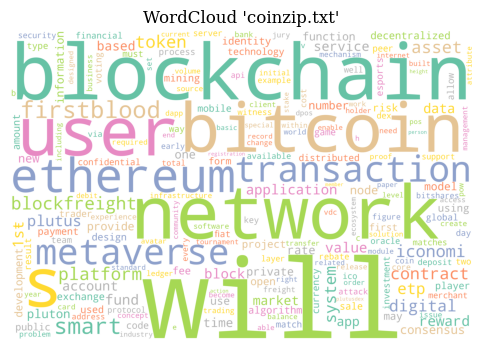

In [43]:
plt.figure(figsize = (10, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud \'coinzip.txt\'', fontsize = 12, fontfamily = 'Serif')